<a href="https://colab.research.google.com/github/YuraLeeKr/ML/blob/main/Gold_PricePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gold Price Prediction**

Importing the Libraries

In [ ]:
import numpy as np # 배열 연산 등을 처리하기 위한 라이브러리
import pandas as pd # 데이터 분석을 위한 라이브러리로, 데이터 프레임을 다루며 데이터 처리, 변형, 필터링 등을 할 수 있습니다
import matplotlib.pyplot as plt # 데이터의 시각화를 위한, 그래프를 그리기 위해 사용
import seaborn as sns # matplotlib을 기반으로 한 고급 시각화 라이브러리, 더 세련된 시각화를 위한 것
from sklearn.model_selection import train_test_split # 데이터를 훈련 세트와 테스트 세트로 분할하기 위한 것
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트 회귀 모델로, 여러 개의 결정 트리를 결합하여 예측을 수행
from sklearn import metrics # 모델의 성능 평가 지표들을 포함한 모듈로, 정확도, RMSE 등 다양한 평가 지표를 제공

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframes
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Find the correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr() #변환 후 상관계수 계산

<Axes: >

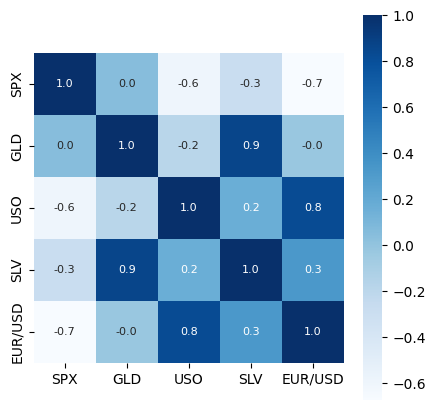

In [ ]:
# constructing a heatmap to understand the correlations
plt.figure(figsize = (5,5)) # 그래프 크기를 (5,5로 설)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
# correlation: 변수 간의 상관관계 행렬
# cbar=True: 오른쪽에 color bar 추가
# square=True: 정사각형 형태로 출력
# fmt='.1f': 소수점 첫째 자리까지 출력
# annot=True: 각 셀에 상관계수 표시
# annot_kws={'size':8}: 숫자의 크기를 8로 설정
# cmap='Blues': 파란색 계열의 색상 사용
# 히트맵은 데이터의 각 특성 간의 상관관계를 시각적으로 보여줌
# 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-5c1d7594d980>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

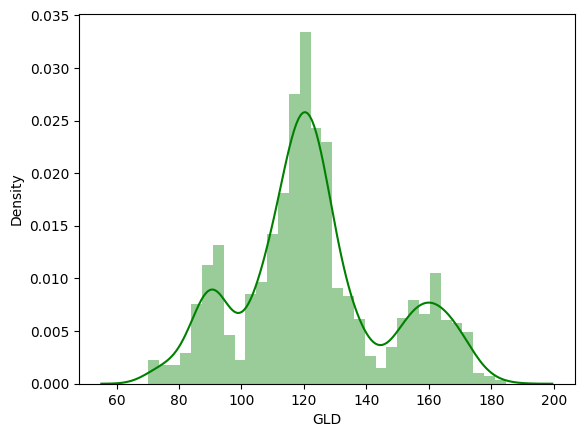

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

                    SPX        USO      SLV   EUR/USD
Date                                                 
2008-01-02  1447.160034  78.470001  15.1800  1.471692
2008-01-03  1447.160034  78.370003  15.2850  1.474491
2008-01-04  1411.630005  77.309998  15.1670  1.475492
2008-01-07  1416.180054  75.500000  15.0530  1.468299
2008-01-08  1390.189941  76.059998  15.5900  1.557099
...                 ...        ...      ...       ...
2018-05-08  2671.919922  14.060000  15.5100  1.186789
2018-05-09  2697.790039  14.370000  15.5300  1.184722
2018-05-10  2723.070068  14.410000  15.7400  1.191753
2018-05-14  2730.129883  14.380000  15.5600  1.193118
2018-05-16  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

Date
2008-01-02     84.860001
2008-01-03     85.570000
2008-01-04     85.129997
2008-01-07     84.769997
2008-01-08     86.779999
                 ...    
2018-05-08    124.589996
2018-05-09    124.330002
2018-05-10    125.180000
2018-05-14    124.489998
2018-05-16    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# X : 입력 데이터(Features)
# Y : 출력 데이터 (Labels)
# test_size=0.2: 데이터의 20프로를 테스트 데이터로 사용하고, 나머지 80%는 훈련 데이터로 사용
# random_state=2: 랜덤 시드를 고정하여 매번 실행해도 같은 데이터 분할이 유지됨
# X_train: 훈련 데이터의 입력값(80%)
# X_test: 테스트 데이터의 입력값(20%)
# Y_train: 훈련 데이터의 출력값(80%)
# Y_test: 테스트 데이터의 출력값(20%)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
# RandomForestRegressor모델을 생성하고, decision tree 100개를 사용하여 예측성능을 높임

In [ ]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.76029913  81.95459983 116.1001002  127.54620096 120.6825014
 154.70829788 150.07909834 126.13770041 117.35879879 125.98680086
 116.68870112 171.46310042 142.04809924 168.17159898 115.21719998
 117.79010018 139.86030335 170.56570107 159.701103   160.2728994
 155.10680048 125.11680034 175.86999963 157.44530337 125.19140052
  93.95499987  77.20050005 120.78599991 119.0990997  167.37939969
  88.2472008  125.17209978  91.19660047 117.66710074 121.15239948
 136.23650121 115.28830112 115.28370093 146.58119936 107.49040088
 104.42550243  87.20069768 126.49390059 117.76810011 152.69119905
 119.63840029 108.2824999  107.94659828  93.20280062 127.17359792
  75.35550007 113.62619897 121.36949993 111.19959959 118.89589901
 120.44379939 159.03890026 168.89490139 147.03579679  85.84839854
  94.57240021  86.9300988   90.4357006  119.04540072 126.42920027
 127.57009984 170.11130043 122.30069957 117.34579898  98.60030006
 168.91490203 142.99839835 132.33460223 121.11740219 121.83259945
 119.8183008

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9895611402442773


Compare the Actual Value and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)
# Y_test는 원래 pandas이므로, 리스트로 변환하여 plt.plot()함수에서 사용할 수 있도록 함

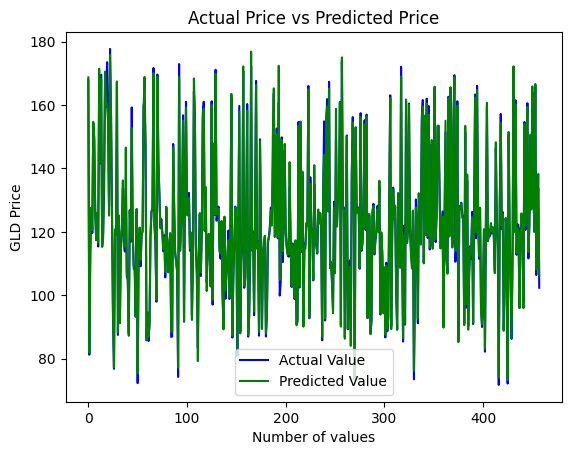

In [ ]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value') # 실제 금 가격 데이터를 파란색 선으로 그림
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
# 예측된 금 데이터를 초록색 선으로 그림
plt.title('Actual Price vs Predicted Price') #그래프 제목
plt.xlabel('Number of values') #x축
plt.ylabel('GLD Price') #y축
plt.legend() #파란선과 초록선이 무엇을 의미하는지 표시해줌
plt.show() #그래프 출력